In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

def process_sentiments(input_file, output_path):
    try:
        print(f"Reading file: {input_file}")
        df = pd.read_csv(input_file)
        
        analyzer = SentimentIntensityAnalyzer()
        
        sentiments = []
        
        for text in tqdm(df['processed_text'], desc="Processing reviews"):
            scores = analyzer.polarity_scores(str(text))
            
            if scores['compound'] >= 0.05:
                sentiment = 'positive'
            elif scores['compound'] <= -0.05:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            
            sentiments.append(sentiment)
        
        df['sentiment'] = sentiments
        
        print("\nSentiment Distribution:")
        sentiment_dist = df['sentiment'].value_counts()
        total_reviews = len(df)
        for category, count in sentiment_dist.items():
            percentage = (count / total_reviews) * 100
            print(f"{category}: {count} reviews ({percentage:.1f}%)")
        
        print(f"\nSaving results to: {output_path}")
        df.to_csv(output_path, index=False)
        
        return df
        
    except FileNotFoundError:
        print(f"Error: Could not find the file at {input_file}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [7]:
input_path = "../data/processed/merged_reviews_metadata_final.csv"
output_path = "../data/processed/sentitiment_analysis_reviews_w_metadata.csv"

df = process_sentiments(input_path, output_path)

Reading file: ../data/processed/merged_reviews_metadata_final.csv
Analyzing sentiments...


Processing reviews: 100%|██████████| 4966/4966 [00:03<00:00, 1283.29it/s]



Sentiment Distribution:
positive: 4131 reviews (83.2%)
negative: 505 reviews (10.2%)
neutral: 330 reviews (6.6%)

Saving results to: ../data/processed/sentitiment_analysis_reviews_w_metadata.csv


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_sentiment_model(input_file):
    try:
        print(f"Reading file: {input_file}")
        df = pd.read_csv(input_file)
        
        # Create confusion matrix
        cm = confusion_matrix(df['manual_sentiment'], df['sentiment'], 
                            labels=['positive', 'neutral', 'negative'])
        
        # Create figure
        plt.figure(figsize=(8, 6))
        
        # Plot normalized confusion matrix
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                    xticklabels=['positive', 'neutral', 'negative'],
                    yticklabels=['positive', 'neutral', 'negative'])
        plt.title("Normalized Confusion Matrix\nVADER Sentiment vs Manual Sentiment")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        
        plt.tight_layout()
        plt.show()
        
        # Calculate accuracy
        accuracy = accuracy_score(df['manual_sentiment'], df['sentiment'])
        print(f"Accuracy: {accuracy:.2%}")
        
        # Display detailed classification report
        report = classification_report(df['manual_sentiment'], 
                                     df['sentiment'],
                                     target_names=['positive', 'neutral', 'negative'])
        print("\nClassification Report:")
        print(report)
        
        # Calculate and display sentiment distribution
        print("\nSentiment Distribution:")
        sentiment_dist = df['sentiment'].value_counts()
        total_reviews = len(df)
        for category, count in sentiment_dist.items():
            percentage = (count / total_reviews) * 100
            print(f"{category}: {count} reviews ({percentage:.1f}%)")
        
        return df
        
    except FileNotFoundError:
        print(f"Error: Could not find the file at {input_file}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

Reading file: ../data/processed/sample_data_vader_and_manual_sentiment.csv


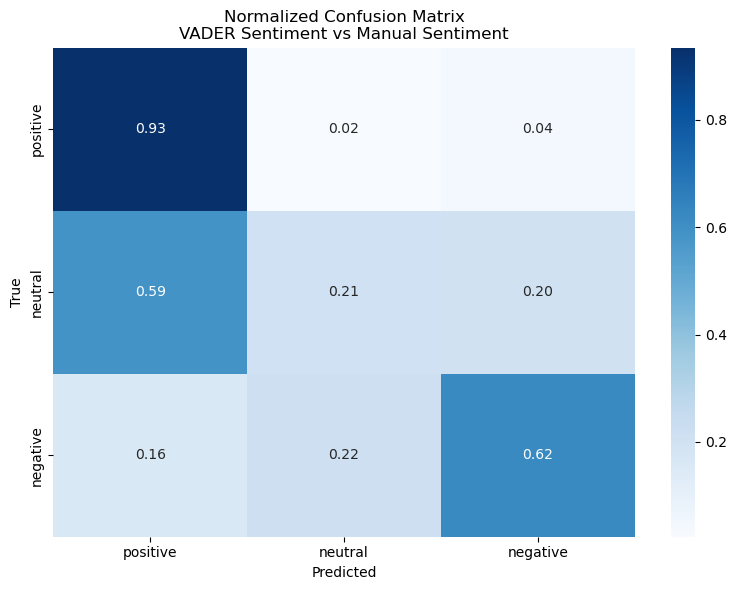

Accuracy: 81.88%

Classification Report:
              precision    recall  f1-score   support

    positive       0.33      0.62      0.43        50
     neutral       0.49      0.21      0.29       138
    negative       0.89      0.93      0.91       811

    accuracy                           0.82       999
   macro avg       0.57      0.59      0.55       999
weighted avg       0.81      0.82      0.80       999


Sentiment Distribution:
positive: 847 reviews (84.8%)
negative: 93 reviews (9.3%)
neutral: 59 reviews (5.9%)


,reviewer_id,asin,reviewer_name,helpful,helpful_ratio,review_text,overall,summary,unix_review_time,review_time,...,review_length,word_count,category,main_category,description,title,brand,price,sentiment,manual_sentiment
0,A2YQ9AX4GOTA0S,B00G4771KA,t. kyle baskett,"[0, 0]",0.0,Helps out tremendously.,5,GoPro fun.,1406073600,"07 23, 2014",...,23,3,Electronics|Camera & Photo|Underwater Photogra...,Camera & Photo,FEATURES of the GoPro Limited Edition LCD Touc...,GoPro Limited Edition LCD Touch BacPac,GoPro,99.99,positive,positive
1,A2R1HUYHXV7H18,B00GMTN96U,Kristi Gilleland,"[0, 0]",0.0,I've got several of these bluetooth speakers n...,4,"Punchy bass, small size, big sound",1406073600,"07 23, 2014",...,2487,451,Electronics|Portable Audio & Video|Portable Sp...,All Electronics,Wireless Portable Bluetooth Speaker: Enjoy a h...,DanceOut & Trade Portable Wireless Bluetooth 4...,Crazedigi,NaN,positive,positive
2,A2ITGW4E6U909T,B00KFAGCUM,Monkeybongo,"[0, 0]",0.0,"For those on older Macbook and Macbook pros, I...",5,Great upgrade for Older Macbooks,1406073600,"07 23, 2014",...,589,105,Uncategorized,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive,positive
3,A3FMTE5CRT8BK9,B005B6O3LU,Anonymous,"[0, 0]",0.0,"Son used for a bit, then wanted something else...",4,Four Stars,1406073600,"07 23, 2014",...,71,15,Electronics|Computers & Accessories|Tablet Acc...,Computers,This premium quality pu leather case supports ...,SANOXY 360 Degrees Rotating Stand Leather Smar...,SANOXY,NaN,neutral,neutral
4,A3CW0ZLUO5X2B1,B00JOS04PK,"35-year Technology Consumer ""8-tracks to 802.11""","[1, 1]",1.0,...between an iPod Nano (7th generation) and w...,5,Does what it's supposed to: moves data and pow...,1406073600,"07 23, 2014",...,587,95,Uncategorized,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A15U6239NOI08C,B00E98O7GC,Lindsay P,"[0, 0]",0.0,"Easy to set up, works wonderfully! Saving us a...",5,"Perfect when the ""office"" is in one corner of ...",1405900800,"07 21, 2014",...,142,29,Electronics|Computers & Accessories|Networking...,Computers,TP-Link N300 Wi-Fi Range Extender (TL-WA850RE),TP-Link N300 Wi-Fi Range Extender (TL-WA850RE),TP-LINK,19.99,positive,positive
995,AHONA9NRSRI3L,B007CO5DZ4,Anonymous,"[0, 0]",0.0,I have 2 of these. They work great.,5,Works Great,1405900800,"07 21, 2014",...,35,8,Electronics|Computers & Accessories|Networking...,Computers,Netgear WNCE2001 Universal Wifi Internet Adapt...,NETGEAR WNCE2001 Universal WiFi Internet Adapt...,NETGEAR,88.88,positive,positive
996,A59QABPYU08MM,B00CTUIT20,"D. Compton ""Deb""","[0, 0]",0.0,Finally a cord long enough; shipped will and w...,5,Five Stars,1405900800,"07 21, 2014",...,56,10,Electronics|Computers & Accessories|Computer A...,Cell Phones & Accessories,Mediabridge 2.0 Micro-USB to USB Cable Sync or...,Mediabridge USB 2.0 - Micro-USB to USB Cable (...,Mediabridge,NaN,positive,neutral
997,A2G9IS4OU2RSJV,B00H3OYSHW,Kevin M.,"[0, 0]",0.0,"Once you use it, you'll love it and never put ...",5,"LOVE IT, LOVE IT",1405900800,"07 21, 2014",...,433,83,Electronics|Computers & Accessories|Tablet Acc...,Computers,"Designed with your iPad Air in mind, the Airbe...","iPad Air Keyboard Case, New Trent Airbender Pr...",New Trent,NaN,positive,positive


In [39]:
evaluate_sentiment_model("../data/processed/sample_data_vader_and_manual_sentiment.csv")

In [41]:
import pandas as pd
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

def improved_sentiments(input_file, output_path):
    try:
        print(f"Reading file: {input_file}")
        df = pd.read_csv(input_file)
        
        analyzer = SentimentIntensityAnalyzer()
        
        sentiments = []
        vader_scores = []
        textblob_scores = []
        confidence_scores = []
        
        for text in tqdm(df['processed_text'], desc="Processing reviews"):
            text = str(text)
            
            # VADER sentiment analysis with full scores
            vader_full = analyzer.polarity_scores(text)
            vader_score = vader_full['compound']
            vader_scores.append(vader_score)
            
            # TextBlob sentiment analysis
            blob = TextBlob(text)
            textblob_score = blob.sentiment.polarity
            textblob_subjectivity = blob.sentiment.subjectivity
            textblob_scores.append(textblob_score)
            
            # Calculate confidence score based on agreement and strength
            vader_confidence = max(abs(vader_score), 0.3)  # Normalize VADER confidence
            textblob_confidence = (1 - textblob_subjectivity)  # Use subjectivity as confidence measure
            
            # Check for agreement between classifiers
            scores_agree = (
                (vader_score > 0 and textblob_score > 0) or
                (vader_score < 0 and textblob_score < 0) or
                (abs(vader_score) < 0.05 and abs(textblob_score) < 0.05)
            )
            
            # Combined weighted score with confidence
            combined_score = (vader_score * vader_confidence + 
                            textblob_score * textblob_confidence) / (vader_confidence + textblob_confidence)
            
            # Enhanced neutral detection
            neutral_indicators = [
                abs(combined_score) < 0.1,  # Close to zero
                abs(vader_score) < 0.05,    # VADER thinks it's neutral
                abs(textblob_score) < 0.05, # TextBlob thinks it's neutral
                textblob_subjectivity < 0.5, # Low subjectivity
                not scores_agree            # Classifiers disagree
            ]
            
            # Calculate confidence in neutral classification
            neutral_confidence = sum(neutral_indicators) / len(neutral_indicators)
            confidence_scores.append(neutral_confidence)
            
            # Refined classification logic
            if neutral_confidence >= 0.6:  # Higher threshold for neutral
                sentiment = 'neutral'
            elif combined_score > 0.15:
                sentiment = 'positive'
            elif combined_score < -0.15:
                sentiment = 'negative'
            else:
                # Borderline cases - use additional context
                if textblob_subjectivity < 0.4:  # Very objective text
                    sentiment = 'neutral'
                else:
                    # Use the stronger signal between VADER and TextBlob
                    sentiment = 'positive' if combined_score > 0 else 'negative'
            
            sentiments.append(sentiment)
        
        # Add results to DataFrame
        df['vader_score'] = vader_scores
        df['textblob_score'] = textblob_scores
        df['neutral_confidence'] = confidence_scores
        df['sentiment'] = sentiments
        
        # Analysis of results
        print("\nSentiment Distribution:")
        sentiment_dist = pd.Series(sentiments).value_counts()
        total = len(sentiments)
        for category, count in sentiment_dist.items():
            percentage = (count / total) * 100
            print(f"{category}: {count} ({percentage:.1f}%)")
        
        print(f"\nSaving results to: {output_path}")
        df.to_csv(output_path, index=False)
        
        return df
        
    except FileNotFoundError:
        print(f"Error: Could not find the file at {input_file}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [42]:
improved_sentiments("../data/processed/sample_data.csv", "../data/processed/sample_data_vader_textblob_manual.csv")

Reading file: ../data/processed/sample_data.csv


Processing reviews: 100%|██████████| 999/999 [00:01<00:00, 856.00it/s]



Sentiment Distribution:
positive: 828 (82.9%)
neutral: 110 (11.0%)
negative: 61 (6.1%)

Saving results to: ../data/processed/sample_data_vader_textblob_manual.csv


,reviewer_id,asin,reviewer_name,helpful,helpful_ratio,review_text,overall,summary,unix_review_time,review_time,...,main_category,description,title,brand,price,manual_sentiment,vader_score,textblob_score,neutral_confidence,sentiment
0,A2YQ9AX4GOTA0S,B00G4771KA,t. kyle baskett,"[0, 0]",0.0,Helps out tremendously.,5,GoPro fun.,1406073600,"07 23, 2014",...,Camera & Photo,FEATURES of the GoPro Limited Edition LCD Touc...,GoPro Limited Edition LCD Touch BacPac,GoPro,99.99,positive,0.3818,0.333333,0.0,positive
1,A2R1HUYHXV7H18,B00GMTN96U,Kristi Gilleland,"[0, 0]",0.0,I've got several of these bluetooth speakers n...,4,"Punchy bass, small size, big sound",1406073600,"07 23, 2014",...,All Electronics,Wireless Portable Bluetooth Speaker: Enjoy a h...,DanceOut & Trade Portable Wireless Bluetooth 4...,Crazedigi,NaN,positive,0.9978,0.263911,0.0,positive
2,A2ITGW4E6U909T,B00KFAGCUM,Monkeybongo,"[0, 0]",0.0,"For those on older Macbook and Macbook pros, I...",5,Great upgrade for Older Macbooks,1406073600,"07 23, 2014",...,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive,0.4939,0.173760,0.2,positive
3,A3FMTE5CRT8BK9,B005B6O3LU,Anonymous,"[0, 0]",0.0,"Son used for a bit, then wanted something else...",4,Four Stars,1406073600,"07 23, 2014",...,Computers,This premium quality pu leather case supports ...,SANOXY 360 Degrees Rotating Stand Leather Smar...,SANOXY,NaN,neutral,0.0000,0.000000,0.8,neutral
4,A3CW0ZLUO5X2B1,B00JOS04PK,"35-year Technology Consumer ""8-tracks to 802.11""","[1, 1]",1.0,...between an iPod Nano (7th generation) and w...,5,Does what it's supposed to: moves data and pow...,1406073600,"07 23, 2014",...,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive,0.3400,0.070000,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A15U6239NOI08C,B00E98O7GC,Lindsay P,"[0, 0]",0.0,"Easy to set up, works wonderfully! Saving us a...",5,"Perfect when the ""office"" is in one corner of ...",1405900800,"07 21, 2014",...,Computers,TP-Link N300 Wi-Fi Range Extender (TL-WA850RE),TP-Link N300 Wi-Fi Range Extender (TL-WA850RE),TP-LINK,19.99,positive,0.7783,0.477778,0.0,positive
995,AHONA9NRSRI3L,B007CO5DZ4,Anonymous,"[0, 0]",0.0,I have 2 of these. They work great.,5,Works Great,1405900800,"07 21, 2014",...,Computers,Netgear WNCE2001 Universal Wifi Internet Adapt...,NETGEAR WNCE2001 Universal WiFi Internet Adapt...,NETGEAR,88.88,positive,0.6249,0.800000,0.0,positive
996,A59QABPYU08MM,B00CTUIT20,"D. Compton ""Deb""","[0, 0]",0.0,Finally a cord long enough; shipped will and w...,5,Five Stars,1405900800,"07 21, 2014",...,Cell Phones & Accessories,Mediabridge 2.0 Micro-USB to USB Cable Sync or...,Mediabridge USB 2.0 - Micro-USB to USB Cable (...,Mediabridge,NaN,neutral,0.2732,-0.016667,0.4,positive
997,A2G9IS4OU2RSJV,B00H3OYSHW,Kevin M.,"[0, 0]",0.0,"Once you use it, you'll love it and never put ...",5,"LOVE IT, LOVE IT",1405900800,"07 21, 2014",...,Computers,"Designed with your iPad Air in mind, the Airbe...","iPad Air Keyboard Case, New Trent Airbender Pr...",New Trent,NaN,positive,0.9352,0.236364,0.0,positive


Reading file: ../data/processed/sample_data_vader_textblob_manual.csv


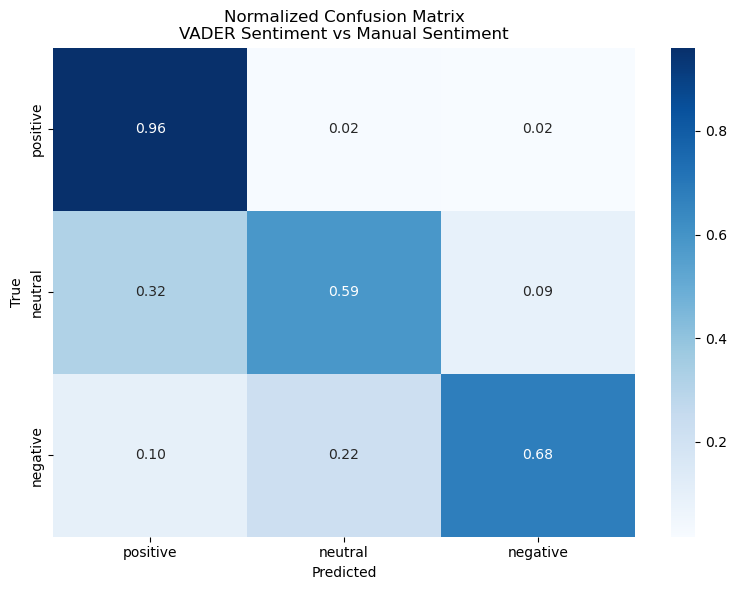

Accuracy: 89.49%

Classification Report:
              precision    recall  f1-score   support

    positive       0.56      0.68      0.61        50
     neutral       0.74      0.59      0.65       138
    negative       0.94      0.96      0.95       811

    accuracy                           0.89       999
   macro avg       0.74      0.74      0.74       999
weighted avg       0.89      0.89      0.89       999


Sentiment Distribution:
positive: 828 reviews (82.9%)
neutral: 110 reviews (11.0%)
negative: 61 reviews (6.1%)


,reviewer_id,asin,reviewer_name,helpful,helpful_ratio,review_text,overall,summary,unix_review_time,review_time,...,main_category,description,title,brand,price,manual_sentiment,vader_score,textblob_score,neutral_confidence,sentiment
0,A2YQ9AX4GOTA0S,B00G4771KA,t. kyle baskett,"[0, 0]",0.0,Helps out tremendously.,5,GoPro fun.,1406073600,"07 23, 2014",...,Camera & Photo,FEATURES of the GoPro Limited Edition LCD Touc...,GoPro Limited Edition LCD Touch BacPac,GoPro,99.99,positive,0.3818,0.333333,0.0,positive
1,A2R1HUYHXV7H18,B00GMTN96U,Kristi Gilleland,"[0, 0]",0.0,I've got several of these bluetooth speakers n...,4,"Punchy bass, small size, big sound",1406073600,"07 23, 2014",...,All Electronics,Wireless Portable Bluetooth Speaker: Enjoy a h...,DanceOut & Trade Portable Wireless Bluetooth 4...,Crazedigi,NaN,positive,0.9978,0.263911,0.0,positive
2,A2ITGW4E6U909T,B00KFAGCUM,Monkeybongo,"[0, 0]",0.0,"For those on older Macbook and Macbook pros, I...",5,Great upgrade for Older Macbooks,1406073600,"07 23, 2014",...,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive,0.4939,0.173760,0.2,positive
3,A3FMTE5CRT8BK9,B005B6O3LU,Anonymous,"[0, 0]",0.0,"Son used for a bit, then wanted something else...",4,Four Stars,1406073600,"07 23, 2014",...,Computers,This premium quality pu leather case supports ...,SANOXY 360 Degrees Rotating Stand Leather Smar...,SANOXY,NaN,neutral,0.0000,0.000000,0.8,neutral
4,A3CW0ZLUO5X2B1,B00JOS04PK,"35-year Technology Consumer ""8-tracks to 802.11""","[1, 1]",1.0,...between an iPod Nano (7th generation) and w...,5,Does what it's supposed to: moves data and pow...,1406073600,"07 23, 2014",...,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive,0.3400,0.070000,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A15U6239NOI08C,B00E98O7GC,Lindsay P,"[0, 0]",0.0,"Easy to set up, works wonderfully! Saving us a...",5,"Perfect when the ""office"" is in one corner of ...",1405900800,"07 21, 2014",...,Computers,TP-Link N300 Wi-Fi Range Extender (TL-WA850RE),TP-Link N300 Wi-Fi Range Extender (TL-WA850RE),TP-LINK,19.99,positive,0.7783,0.477778,0.0,positive
995,AHONA9NRSRI3L,B007CO5DZ4,Anonymous,"[0, 0]",0.0,I have 2 of these. They work great.,5,Works Great,1405900800,"07 21, 2014",...,Computers,Netgear WNCE2001 Universal Wifi Internet Adapt...,NETGEAR WNCE2001 Universal WiFi Internet Adapt...,NETGEAR,88.88,positive,0.6249,0.800000,0.0,positive
996,A59QABPYU08MM,B00CTUIT20,"D. Compton ""Deb""","[0, 0]",0.0,Finally a cord long enough; shipped will and w...,5,Five Stars,1405900800,"07 21, 2014",...,Cell Phones & Accessories,Mediabridge 2.0 Micro-USB to USB Cable Sync or...,Mediabridge USB 2.0 - Micro-USB to USB Cable (...,Mediabridge,NaN,neutral,0.2732,-0.016667,0.4,positive
997,A2G9IS4OU2RSJV,B00H3OYSHW,Kevin M.,"[0, 0]",0.0,"Once you use it, you'll love it and never put ...",5,"LOVE IT, LOVE IT",1405900800,"07 21, 2014",...,Computers,"Designed with your iPad Air in mind, the Airbe...","iPad Air Keyboard Case, New Trent Airbender Pr...",New Trent,NaN,positive,0.9352,0.236364,0.0,positive


In [43]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Import numpy at the top with other imports
import numpy as np

# Use the function
evaluate_sentiment_model("../data/processed/sample_data_vader_textblob_manual.csv")

In [3]:
import pandas as pd
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

def update_all_sentiment_analysis(input_file, output_path):
    try:
        print(f"Reading existing file: {input_file}")
        df = pd.read_csv(input_file)
        
        analyzer = SentimentIntensityAnalyzer()
        new_sentiments = []
        
        print("Updating sentiment analysis...")
        for text in tqdm(df['processed_text'], desc="Processing reviews"):
            text = str(text)
            
            # VADER sentiment analysis
            vader_full = analyzer.polarity_scores(text)
            vader_score = vader_full['compound']
            
            # TextBlob sentiment analysis
            blob = TextBlob(text)
            textblob_score = blob.sentiment.polarity
            textblob_subjectivity = blob.sentiment.subjectivity
            
            # Calculate confidence scores
            vader_confidence = max(abs(vader_score), 0.3)
            textblob_confidence = (1 - textblob_subjectivity)
            
            # Check for agreement
            scores_agree = (
                (vader_score > 0 and textblob_score > 0) or
                (vader_score < 0 and textblob_score < 0) or
                (abs(vader_score) < 0.05 and abs(textblob_score) < 0.05)
            )
            
            # Combined score
            combined_score = (vader_score * vader_confidence + 
                            textblob_score * textblob_confidence) / (vader_confidence + textblob_confidence)
            
            # Neutral detection
            neutral_indicators = [
                abs(combined_score) < 0.1,
                abs(vader_score) < 0.05,
                abs(textblob_score) < 0.05,
                textblob_subjectivity < 0.5,
                not scores_agree
            ]
            
            neutral_confidence = sum(neutral_indicators) / len(neutral_indicators)
            
            # Classification
            if neutral_confidence >= 0.6:
                sentiment = 'neutral'
            elif combined_score > 0.15:
                sentiment = 'positive'
            elif combined_score < -0.15:
                sentiment = 'negative'
            else:
                if textblob_subjectivity < 0.4:
                    sentiment = 'neutral'
                else:
                    sentiment = 'positive' if combined_score > 0 else 'negative'
            
            new_sentiments.append(sentiment)
        
        # Compare old and new sentiments
        old_sentiments = df['sentiment'].tolist()
        changes = sum(1 for old, new in zip(old_sentiments, new_sentiments) if old != new)
        print(f"\nChanges in sentiment classifications: {changes} out of {len(df)} ({(changes/len(df))*100:.1f}%)")
        
        # Update only the sentiment column
        df['sentiment'] = new_sentiments
        
        # Show distribution of new sentiments
        print("\nNew Sentiment Distribution:")
        sentiment_dist = pd.Series(new_sentiments).value_counts()
        total = len(new_sentiments)
        for category, count in sentiment_dist.items():
            percentage = (count / total) * 100
            print(f"{category}: {count} ({percentage:.1f}%)")
        
        print(f"\nSaving updated results to: {output_path}")
        df.to_csv(output_path, index=False)
        
        return df
        
    except FileNotFoundError:
        print(f"Error: Could not find the file at {input_file}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [4]:
update_all_sentiment_analysis("../data/processed/final_sentiment_analysis_data.csv", "../data/processed/final_indepth_sentiment_analysis.csv")

Reading existing file: ../data/processed/final_sentiment_analysis_data.csv
Updating sentiment analysis...


Processing reviews: 100%|██████████| 4966/4966 [00:08<00:00, 595.12it/s]



Changes in sentiment classifications: 437 out of 4966 (8.8%)

New Sentiment Distribution:
positive: 4042 (81.4%)
neutral: 596 (12.0%)
negative: 328 (6.6%)

Saving updated results to: ../data/processed/final_indepth_sentiment_analysis.csv


,reviewer_id,asin,reviewer_name,helpful,helpful_ratio,review_text,overall,summary,unix_review_time,review_time,...,formatted_date,review_length,word_count,category,main_category,description,title,brand,price,sentiment
0,A2YQ9AX4GOTA0S,B00G4771KA,t. kyle baskett,"[0, 0]",0.0,Helps out tremendously.,5,GoPro fun.,1406073600,"07 23, 2014",...,"July 23, 2014",23,3,Electronics|Camera & Photo|Underwater Photogra...,Camera & Photo,FEATURES of the GoPro Limited Edition LCD Touc...,GoPro Limited Edition LCD Touch BacPac,GoPro,99.99,positive
1,A2R1HUYHXV7H18,B00GMTN96U,Kristi Gilleland,"[0, 0]",0.0,I've got several of these bluetooth speakers n...,4,"Punchy bass, small size, big sound",1406073600,"07 23, 2014",...,"July 23, 2014",2487,451,Electronics|Portable Audio & Video|Portable Sp...,All Electronics,Wireless Portable Bluetooth Speaker: Enjoy a h...,DanceOut & Trade Portable Wireless Bluetooth 4...,Crazedigi,NaN,positive
2,A2ITGW4E6U909T,B00KFAGCUM,Monkeybongo,"[0, 0]",0.0,"For those on older Macbook and Macbook pros, I...",5,Great upgrade for Older Macbooks,1406073600,"07 23, 2014",...,"July 23, 2014",589,105,Uncategorized,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive
3,A3FMTE5CRT8BK9,B005B6O3LU,Anonymous,"[0, 0]",0.0,"Son used for a bit, then wanted something else...",4,Four Stars,1406073600,"07 23, 2014",...,"July 23, 2014",71,15,Electronics|Computers & Accessories|Tablet Acc...,Computers,This premium quality pu leather case supports ...,SANOXY 360 Degrees Rotating Stand Leather Smar...,SANOXY,NaN,neutral
4,A3CW0ZLUO5X2B1,B00JOS04PK,"35-year Technology Consumer ""8-tracks to 802.11""","[1, 1]",1.0,...between an iPod Nano (7th generation) and w...,5,Does what it's supposed to: moves data and pow...,1406073600,"07 23, 2014",...,"July 23, 2014",587,95,Uncategorized,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,A3DKTNZ9A1DY0X,B0040IG1A6,Anonymous,"[0, 0]",0.0,This cable did not work upon receipt. It was ...,2,buyer beware,1405382400,"07 15, 2014",...,"July 15, 2014",498,90,Electronics|Computers & Accessories|Computer A...,Computers,Use the PTC USB 2.0 active repeater or extende...,PTC 15 m / 49 ft USB2.0 Active repeater/extens...,PTC,2.54,positive
4962,A2KZQEKUS3G02I,B00B588HY2,G. GOELZ,"[0, 0]",0.0,Great card fast plenty of storage...anyone usi...,5,fast card,1405382400,"07 15, 2014",...,"July 15, 2014",106,19,Electronics|Computers & Accessories|Computer A...,Computers,High speed memory cards recommended for DSLR c...,Sony 8GB SDHC/SDXC Class 10 UHS-1 R40 Memory C...,Sony,NaN,positive
4963,A1FAETFXIWAELQ,B00H7Y3I4M,"Michael R. Curry ""Tenacious--M""","[0, 0]",0.0,I bought this for my new HTPC build.Pros:Every...,5,Every cable you need and more Silverstone qual...,1405382400,"07 15, 2014",...,"July 15, 2014",176,24,Uncategorized,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive
4964,APST59ZNX96IG,B004QQTXXY,Anonymous,"[0, 0]",0.0,I was looking for something to cut glare. I u...,5,I use my iPad for music and lighting condition...,1405382400,"07 15, 2014",...,"July 15, 2014",356,64,Uncategorized,Uncategorized,No description available,Untitled,Unknown Brand,NaN,positive
